/workspaces/DL-Excersize/notebooks/DL3_20241006/ch03


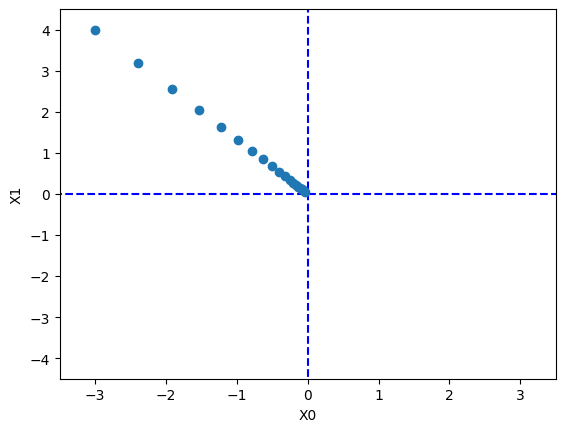

In [14]:
# coding: utf-8
import os, sys
print(os.getcwd())

import numpy as np
import matplotlib.pylab as plt

def _numerical_gradient_no_batch(f,x):
    h = 1e-4
    grad = np.zeros_like(x)

    for idx in range(x.size):
        tmp_val = x[idx]

        x[idx] = float(tmp_val) + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    return grad

def numerical_gradient(f,X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f,X)
    
    else:
        grad = np.zeros_like(X)

        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f,x)

        return grad
    
def gradient_descent(f,init_x,lr=0.01,step_num=100):
    x = init_x
    x_history=[]

    for i in range(step_num):
        x_history.append(x.copy())

        grad = numerical_gradient(f,x)
        x -= lr * grad

    return x, np.array(x_history)

def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0,4.0])

lr = 0.1
step_num = 20
x,x_history = gradient_descent(function_2,init_x,lr=lr,step_num=step_num)

plt.plot([-5,5],[0,0],'--b')
plt.plot([0,0],[-5,5],'--b')
plt.plot(x_history[:,0],x_history[:,1],'o')

plt.xlim(-3.5,3.5)
plt.ylim(-4.5,4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()


# Gradient Descent 코드 흐름 설명

## 1. 목적

이 코드는 함수

```
f(x0, x1) = x0^2 + x1^2
```

에 대해:

* 수치 미분으로 그래디언트 계산
* 경사하강법(Gradient Descent) 수행
* 이동 경로를 2D 평면에 시각화

---

## 2. 함수 구조

### (1) `_numerical_gradient_no_batch(f, x)`

중앙차분으로 편미분 계산:

∂f/∂xi ≈ (f(x+h) - f(x-h)) / (2h)

* h = 1e-4
* 각 차원별로 반복
* 결과: gradient 벡터 반환

---

### (2) `numerical_gradient(f, X)`

* 입력이 1차원 → 단일 벡터 미분
* 2차원 이상 → 배치 처리

현재 코드에서는 항상 1차원 벡터만 들어간다.

---

### (3) `gradient_descent(f, init_x, lr, step_num)`

경사하강 알고리즘 구현부.

#### 입력

* init_x : 초기 위치
* lr : learning rate
* step_num : 반복 횟수

#### 내부 흐름

```
x = init_x
for step:
    grad = ∇f(x)
    x = x - lr * grad
```

이 수식은 다음을 의미한다:

```
x_{t+1} = x_t - η ∇f(x_t)
```

여기서

* η = learning rate
* ∇f(x_t) = 현재 위치의 기울기

---

### (4) `function_2(x)`

정의된 목적 함수:

```
f(x) = x0^2 + x1^2
```

이 함수는 convex 함수이며,
최소값은 (0,0)에서 0.

해석적 gradient는:

```
∇f = (2x0, 2x1)
```

---

## 3. 실행 흐름

### Step 1. 초기값 설정

```
init_x = [-3, 4]
```

초기 위치는 원점에서 떨어진 점.

---

### Step 2. 경사하강 수행

```
lr = 0.1
step_num = 20
```

이 경우 업데이트 식은:

```
x ← x - 0.1 * (2x)
x ← x - 0.2x
x ← 0.8x
```

즉 매 step마다 0.8배씩 줄어든다.

수렴 과정은 지수적 감소:

```
x_t = (0.8)^t * x_0
```

---

### Step 3. 경로 기록

```
x_history.append(x.copy())
```

각 스텝의 좌표를 저장.

shape:

```
x_history → (step_num, 2)
```

---

### Step 4. 시각화

```
plt.plot(x_history[:,0], x_history[:,1], 'o')
```

결과:

* 점들이 원점을 향해 직선으로 수렴
* 타원 경로가 아니라 직선인 이유:
  이 함수는 등방성(모든 방향 동일 curvature)

---

## 4. 수학적 해석

이 예제는 다음을 보여준다:

1. 수치미분이 정상 작동하는지
2. Gradient Descent가 최소점을 찾는 과정
3. learning rate가 수렴 속도에 미치는 영향

---

## 5. learning rate 영향

| lr 값  | 결과     |
| ----- | ------ |
| 너무 작음 | 느린 수렴  |
| 적절함   | 안정적 수렴 |
| 너무 큼  | 발산 가능  |

예:

* lr = 1.0 → 발산
* lr = 0.1 → 안정 수렴

---

## 6. 핵심 개념 요약

* 수치미분
* 그래디언트
* 경사하강 업데이트
* convex 최적화
* 지수 수렴

---

필요하면 추가 확장 가능:

* analytic gradient로 바꿔서 속도 비교
* learning rate 실험 그래프
* 비등방성 함수 (예: 10x0^2 + x1^2)에서 경로 분석
* 발산 예시 시뮬레이션

---

# 코드에서 등장하는 함수와 객체 설명

## 1. 사용자 정의 함수

### ① `_numerical_gradient_no_batch(f, x)`

* 타입: 함수
* 입력: 함수 f, 벡터 x (numpy array)
* 출력: x와 동일 shape의 gradient 벡터
* 역할: 중앙차분으로 편미분 계산 (실제 미분 로직 담당)

---

### ② `numerical_gradient(f, X)`

* 타입: 함수 (wrapper)
* 입력: 함수 f, 벡터 또는 행렬 X
* 출력: gradient
* 역할: 입력 차원에 따라 batch 처리 여부 결정

현재 코드에서는 항상 1차원 벡터가 들어가므로
실질적으로 `_numerical_gradient_no_batch`를 호출하는 중간 계층이다.

---

### ③ `gradient_descent(f, init_x, lr, step_num)`

* 타입: 최적화 알고리즘 함수
* 입력:

  * f : 목적 함수
  * init_x : 초기 위치 (numpy array)
  * lr : learning rate (float)
  * step_num : 반복 횟수 (int)
* 출력:

  * 최종 x
  * x_history (이동 경로 기록)

역할:

```
x ← x - lr * ∇f(x)
```

를 반복 수행하는 최적화 엔진.

---

### ④ `function_2(x)`

* 타입: 목적 함수
* 입력: 길이 2 numpy 벡터
* 출력: 스칼라 값
* 의미:

  f(x) = x0^2 + x1^2

최소값은 (0,0).

---

## 2. 주요 객체(변수) 설명

### ① `init_x`

* 타입: numpy.ndarray
* 값: [-3.0, 4.0]
* 의미: 초기 위치 벡터

---

### ② `x`

* 타입: numpy.ndarray
* 의미: 현재 위치 벡터
* gradient descent 반복마다 갱신됨

---

### ③ `grad`

* 타입: numpy.ndarray
* 의미: 현재 위치에서의 gradient 벡터
* 계산식:

  grad = numerical_gradient(f, x)

---

### ④ `x_history`

* 타입: list → 최종적으로 numpy.ndarray
* shape: (step_num, 2)
* 의미: 각 스텝에서의 위치 기록

시각화에 사용됨.

---

### ⑤ `lr`

* 타입: float
* 의미: learning rate
* gradient 방향으로 얼마나 이동할지 결정

---

### ⑥ `step_num`

* 타입: int
* 의미: 반복 횟수

---

## 3. matplotlib 객체

### ① `plt.plot()`

* 경로 시각화
* x_history[:,0], x_history[:,1] → 좌표 경로

### ② `plt.xlim(), plt.ylim()`

* 좌표 범위 지정

### ③ `plt.show()`

* 최종 렌더링

---

## 4. 객체 간 관계 구조

관계 흐름:

```
function_2
     ↓
numerical_gradient
     ↓
gradient_descent
     ↓
x_history
     ↓
matplotlib 시각화
```

즉,

목적 함수 → gradient 계산 → 최적화 수행 → 경로 기록 → 시각화

---

## 5. 객체 유형 정리 표

| 이름                 | 종류      | 역할          |
| ------------------ | ------- | ----------- |
| function_2         | 함수      | 목적 함수       |
| numerical_gradient | 함수      | gradient 계산 |
| gradient_descent   | 함수      | 최적화 수행      |
| init_x             | ndarray | 초기 위치       |
| x                  | ndarray | 현재 위치       |
| grad               | ndarray | 기울기 벡터      |
| x_history          | ndarray | 이동 경로 기록    |
| lr                 | float   | 학습률         |
| step_num           | int     | 반복 횟수       |

---
